## 1 .撰寫一個 Flask Web 應用程式，分別使用 Get / Post 來發送 Request，且能取得 Request 傳遞的參數。

### Project Structure


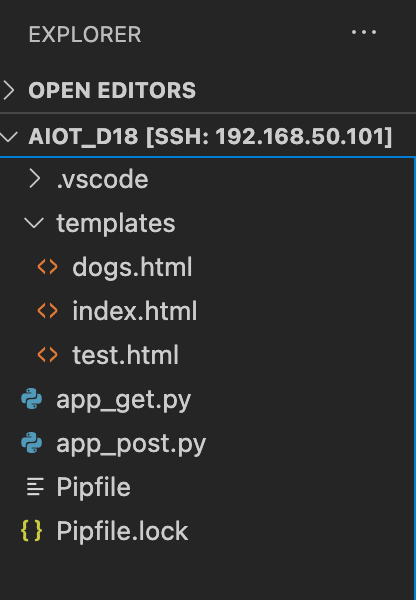

#### URL for "Get" Method: 

http://localhost:5000/dogs?breed=Labrador%20Retrievers

#### Result for "Get" Method:

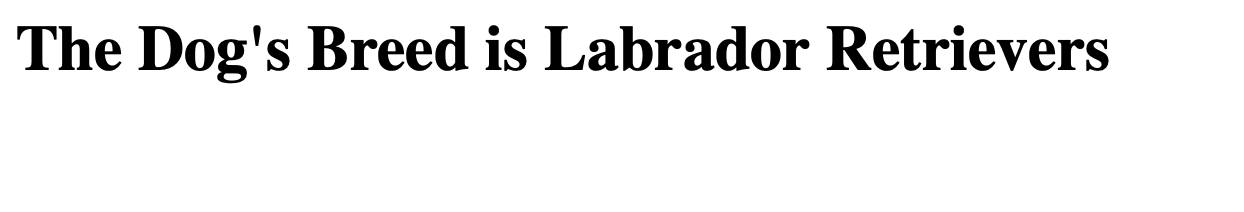

#### URL for "Post" Method:

http://localhost:5000

#### Result for "Post" Method:

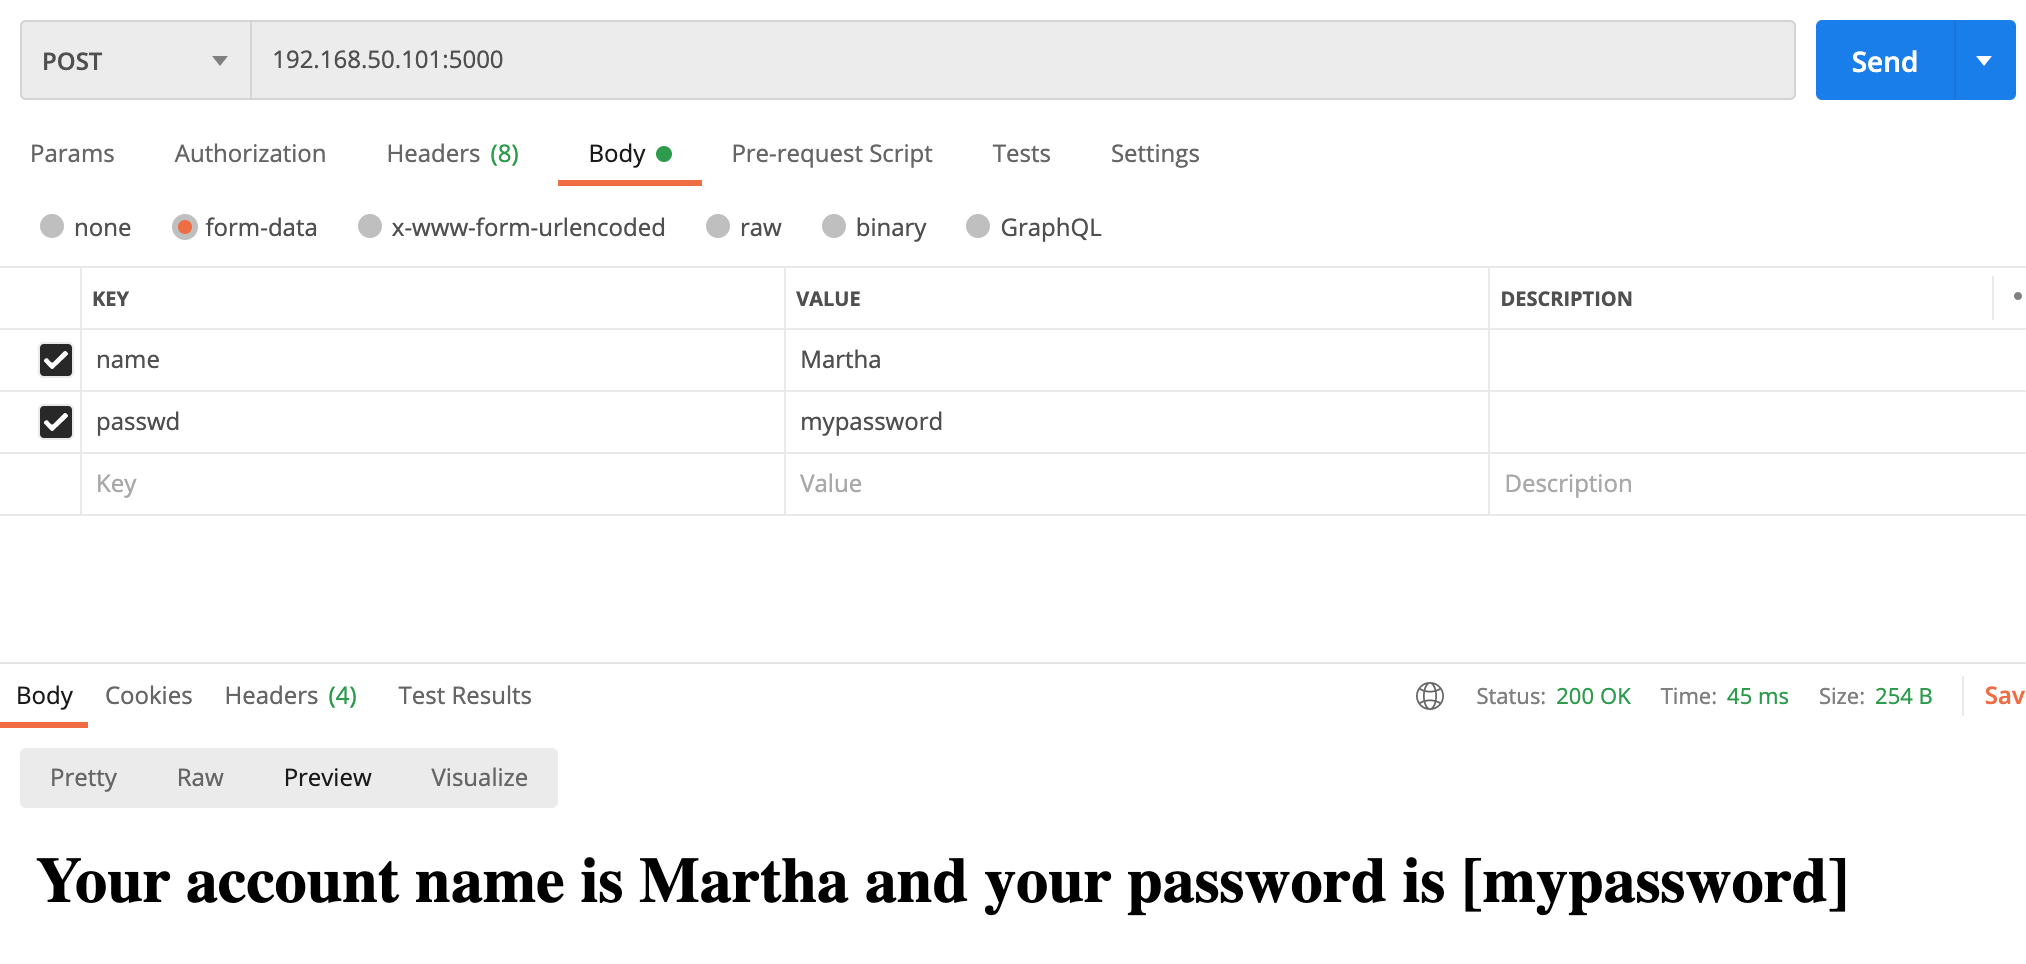

## 2. 實作檔案上傳功能，並提供簡易畫面使其能透過畫面上傳檔案。


a. 上傳畫面：

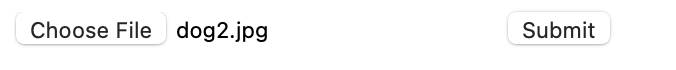

b. 成功畫面

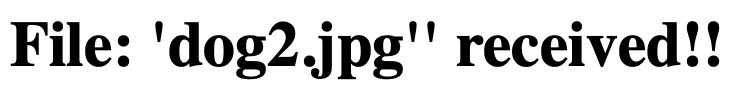


#### 1a. Get Method:

In [ ]:
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/', methods=['GET'])
def index():
    return render_template('index.html')

@app.route('/dogs', methods=['GET'])
def dog():
    breed_arg = request.args.get("breed")
    return render_template('dogs.html', breed=breed_arg)

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0')

HTML:

<html>
<body>
<h1>The Dog's Breed is {{ breed }}</h1>
</body>
</html>

#### 1b. Post Method:

In [ ]:
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/', methods=['POST'])
def index():
    name = request.form.get('name') 
    passwd = request.form.get('passwd') 
    return render_template("account.html", name=name, passwd=passwd)
    
if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0')

HTML:

<html>
<body>
<h1>Your account name is {{ name }} and your password is [{{ passwd }}]</h1>
</body>
</html>

#### 2. Upload with "Post" method

In [ ]:
from flask import Flask, request, render_template, redirect, url_for
from werkzeug.utils import secure_filename

app = Flask(__name__)

@app.route('/')
def index():
    return redirect(url_for('upload_form'))

@app.route('/upload')
def upload_form():
   return render_template('upload_form.html')
	
@app.route('/uploader', methods = ['GET', 'POST'])
def upload_file():
   if request.method == 'POST':
      one_file = request.files['file']
      fn = secure_filename(one_file.filename)
      one_file.save(fn)
      return render_template("file_received.html", file_name=fn)

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0')


HTML:

<html>
   <body>
      <form action = "http://localhost:5000/uploader" method = "POST" 
         enctype = "multipart/form-data">
         <input type = "file" name = "file" />
         <input type = "submit"/>
      </form>   
   </body>
</html>